# 데이터 정리하기 - 데이터 전처리

## 1 결측치

1. 결측값
    1. NaN
        - 자료형이 Float
        - 배열에서 연산할 경우 오류가 발생하지 않지만  결과값이 NaN이 됨
    2. None 
        - 자료형이 None
        - 배열 연산을 할 경우 오류가 발생
3. 처리 방법
    1. 해당 레코드 삭제
    2. 자동으로 채우기
        1. 수치형의 경우
            1. 평균
            2. 중앙값
            3. 0으로 채우기
            4. 앞 방향 또는 뒷 방향으로 채우기
        2. 범주형
            1. 최빈값
    3. 전문가의 의견에 따라 직접 채우기


```
결측값(NaN, None) 처리 방법 
- isnull() : 결측값 확인 (결측 이면  True , 결측이 아니면  False )
- notnull() : 결측값 확인 (결측 이면  False , 결측이 아니면  True )
- dropna() : 결측값을 삭제
    - axis=0 : 행 삭제 / axis=1 : 열 삭제
    - inplace = True : drop후 원본에 반영
- fillna(Num) : 결측을 Num 으로 채워 넣음
    - fillna(method='ffill'), fillna(method='bfill') : 앞 방향, 뒷 방향
```

### 타이타닉 데이터

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# df.head()
# df.tail()
# df.info()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 실습은 하지 않습니다.
sex_mean = df.groupby('Sex')['Age'].mean()
sex_mean

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [ ]:
# 실습은 하지 않습니다.
df.loc[(df["Sex"] == 'female') & (df["Age"].isnull()), "Age"] = int(sex_mean[0])
df.loc[(df["Sex"] == 'male') & (df["Age"].isnull()), "Age"] = int(sex_mean[1])

df['Age'] = df['Age'].apply(lambda x:round(x))

df.head(40)

In [ ]:
# 실습은 하지 않습니다.
# 맨 앞의 알파벳 추출하기
df['Cabin'] = df['Cabin'].fillna('N') #결측치를 'N'으로 채우라는 명령
df['Cabin'] = df['Cabin'].apply(lambda x:x[0]) #해당 값을 0번째 값으로만 채우라는 명령

In [17]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
df.Embarked.isna().sum()
df.Embarked.isnull().sum()
df['Embarked'].isnull().sum()

2

In [22]:
df['Embarked'] = df['Embarked'].fillna('S')

In [23]:
df.Embarked.isna().sum()

0

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
df.Cabin.value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [26]:
# 맨 앞의 알파벳 추출하기
df['Cabin'] = df['Cabin'].fillna('N') #결측치를 'N'으로 채우라는 명령
df['Cabin'] = df['Cabin'].apply(lambda x:x[0]) #해당 값을 0번째 값으로만 채우라는 명령

### 기상 데이터

In [28]:
df = pd.read_csv('data.csv', encoding='cp949')
df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3


In [31]:
# df.head()
# df.tail()
# df.info()
df.isna().sum()

일시                   0
최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [32]:
df[df['일시'].str[:7] == '2010.12']

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
334,2010.12.1,6.2,16.4,0.0,6.3,3.1,25.2
335,2010.12.2,6.2,12.2,7.5,9.4,3.9,14.1
336,2010.12.3,2.0,11.4,0.0,18.4,5.2,50.5
337,2010.12.4,-0.5,11.3,0.0,8.3,2.9,39.4
338,2010.12.5,2.8,13.8,0.0,8.4,3.1,165.8
339,2010.12.6,1.6,13.1,0.0,24.6,8.6,14.1
340,2010.12.7,0.4,2.0,0.0,20.6,NaN,340.2
341,2010.12.8,NaN,NaN,NaN,NaN,NaN,NaN
342,2010.12.9,NaN,NaN,NaN,NaN,NaN,NaN
343,2010.12.10,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['일강수량(mm)'] = df['일강수량(mm)'].fillna(0)

In [45]:
df[df['일시'].str[:7] == '2010.12']['최대 순간 풍속(m/s)'].describe()

count    25.000000
mean     15.812000
std       6.189327
min       6.300000
25%       9.900000
50%      15.500000
75%      20.300000
max      26.700000
Name: 최대 순간 풍속(m/s), dtype: float64

In [46]:
(24.6 + 20.6 + 26.7 + 24.5)/4

24.1

In [47]:
df['최대 순간 풍속(m/s)'] = df['최대 순간 풍속(m/s)'].fillna(24.1)

In [48]:
df[df['일시'].str[:7]=='2010.12']['평균 풍속(m/s)'].describe()

count    23.000000
mean      4.791304
std       1.825554
min       2.900000
25%       3.450000
50%       4.200000
75%       5.500000
max       9.600000
Name: 평균 풍속(m/s), dtype: float64

In [49]:
df['평균 풍속(m/s)'] = df['평균 풍속(m/s)'].fillna(4.791304)

In [50]:
df[df['일시'].str[:7]=='2010.12']

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
334,2010.12.1,6.2,16.4,0.0,6.3,3.100000,25.2
335,2010.12.2,6.2,12.2,7.5,9.4,3.900000,14.1
336,2010.12.3,2.0,11.4,0.0,18.4,5.200000,50.5
337,2010.12.4,-0.5,11.3,0.0,8.3,2.900000,39.4
338,2010.12.5,2.8,13.8,0.0,8.4,3.100000,165.8
339,2010.12.6,1.6,13.1,0.0,24.6,8.600000,14.1
340,2010.12.7,0.4,2.0,0.0,20.6,4.791304,340.2
341,2010.12.8,NaN,NaN,0.0,24.1,4.791304,NaN
342,2010.12.9,NaN,NaN,0.0,24.1,4.791304,NaN
343,2010.12.10,NaN,NaN,0.0,24.1,4.791304,NaN


In [51]:
df.columns

Index(['일시', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 순간 풍속(m/s)', '평균 풍속(m/s)',
       '최대 순간 풍속 풍향(hhmi)'],
      dtype='object')

In [52]:
df[df['일시'].str[:7]=='2010.12']['최저기온(°C)'].describe()

count    25.000000
mean      0.336000
std       3.233275
min      -4.400000
25%      -2.200000
50%      -0.100000
75%       2.000000
max       6.400000
Name: 최저기온(°C), dtype: float64

In [53]:
df['최저기온(°C)'] = df['최저기온(°C)'].fillna(-0.1)

In [54]:
df[df['일시'].str[:7]=='2010.12']['최고기온(°C)'].describe()

count    25.000000
mean      7.908000
std       5.339547
min      -1.000000
25%       2.200000
50%       8.800000
75%      12.800000
max      16.400000
Name: 최고기온(°C), dtype: float64

In [55]:
df['최고기온(°C)'] = df['최고기온(°C)'].fillna(2.2)

In [56]:
df.isna().sum()

일시                   0
최저기온(°C)             0
최고기온(°C)             0
일강수량(mm)             0
최대 순간 풍속(m/s)        0
평균 풍속(m/s)           0
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [57]:
df.dropna(axis=1)

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4
3,2010.1.4,1.0,11.5,1.0,22.4,5.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1
...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8
361,2010.12.28,1.0,8.8,0.0,15.5,5.2
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8


In [58]:
df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3


In [59]:
df.dropna(axis=1, inplace=True)
df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4
3,2010.1.4,1.0,11.5,1.0,22.4,5.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1
...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8
361,2010.12.28,1.0,8.8,0.0,15.5,5.2
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8


## 2 데이터 일반화

* 특정 구간에 분포하는 값으로 스케일 변화를 합니다.

In [60]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [62]:
df['Age'].isna().sum()

0

In [63]:
def int_age(x):
    return int(x)

df['Age'] = df['Age'].apply(int_age)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [64]:
def int_sex(x):
    if x == 'male':
        return 1
    else:
        return 0

df['Sex'] = df['Sex'].apply(int_sex)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C


## 이상치 처리

* 이상치 유무에 따라 분석 결과가 달라지기 때문에 이전에 이상치를 찾아 다른 값으로 변환하거나 제거합니다.

In [65]:
df = pd.read_excel('data.xlsx', index_col='번호')
df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [66]:
df['국어'] = df['국어'].replace(-57, 57)
df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


In [67]:
df.describe()

,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,144.500000,77.300000,62.00000
std,234.719336,29.616249,29.06315
min,32.000000,24.000000,21.00000
25%,59.750000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,89.500000,99.250000,87.00000
max,810.000000,120.000000,100.00000


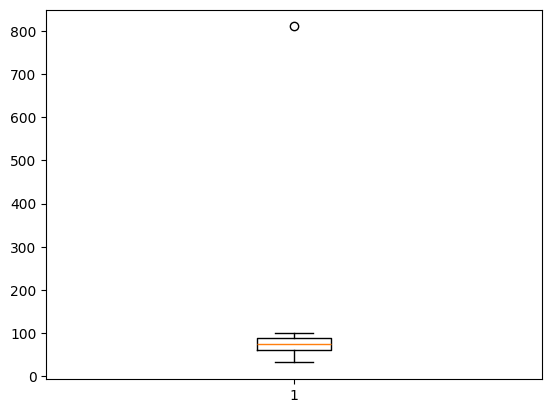

In [68]:
import matplotlib.pyplot as plt

plt.boxplot(df['국어'])
plt.show()

In [69]:
q3 = df.quantile(0.75)
q3

국어    89.50
수학    99.25
영어    87.00
Name: 0.75, dtype: float64

In [70]:
q1 = df.quantile(0.25)
q1

국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64

In [71]:
IQR = q3 - q1
IQR

국어    29.75
수학    45.00
영어    51.75
dtype: float64

In [72]:
q3['국어']

89.5

In [73]:
def kor_outlier(df):
    kor_score = df['국어']
    if kor_score > q3['국어'] + 1.5 * IQR['국어'] or kor_score < q1['국어'] - 1.5 * IQR['국어']:
        return True
    else:
        return False

df['국어_이상치여부'] = df.apply(kor_outlier, axis=1)
df

,국어,수학,영어,국어_이상치여부
번호,,,,
1,32,80,100,False
2,50,100,90,False
3,810,100,78,True
4,80,120,21,False
5,88,67,29,False
6,70,50,69,False
7,68,24,34,False
8,90,97,39,False
9,57,48,67,False


In [74]:
df['국어'] = df['국어'].replace(810, 81)
df

,국어,수학,영어,국어_이상치여부
번호,,,,
1,32,80,100,False
2,50,100,90,False
3,81,100,78,True
4,80,120,21,False
5,88,67,29,False
6,70,50,69,False
7,68,24,34,False
8,90,97,39,False
9,57,48,67,False
